# Predicting Forest Cover Types
## 1. Domain Background
## 2. Features Exploration and Visualization
## 3. Feature Engineering

<span style="color:green">by *Valentina Fontiveros*</span>

![alt text](forest.png "title")

![](park_photo.png)

## 1. Domain Background

This dataset comes from a study conducted in four wilderness areas within the Roosevelt National Forest of northern Colorado. These areas represent forests with very little human disturbances – the existing forest cover types there are more a result of ecological processes rather than forest management practices. The data is in raw form and contains categorical data such as wilderness areas and soil type.

Being able to predict which fauna grows optimally under various environmental conditions would aid in conservation and reforestation efforts.

### Controls on Plant Growth

Since the training dataset describes various environmental factors associated with each 
cover type, we should consider how to properly process the data to fit with our biological
knowledge.

There are various abiotic factors affecting plant species distribution and growth:

- elevation / temperature      : plant species are very sensitive to elevation / temperature differences 
- water / drainage             : water availability is related to slope, soil composition, and surface water location. 
- sunlight / shade /           : sunlight availability is related to hillshade / aspect
- nutrient availability        : soils have varying levels of organic and inorganic nutrients / magnesium / iron helps



### Prediction Targets: Tree Species in Roosevelt National Forest

- 1 - Spruce/Fir
    > Some 5% of Colorado’s landscape is occupied by this forest type, which is one of the few Colorado forest types that is not fire-adapted. This ecological zone occurs at the highest elevations at all exposures and
topographic positions from 5,200 to over 6,000 feet in elevation. In general, the zone occurs on exposed
landforms that are convex in shape (Simon 2012). Moisture content is not limiting and is present both
from fog deposition and ambient rainfall. Soils vary from shallow rocky substrates where Fraser fir
dominates to deeper mineral soils with a well-developed organic layer in mixed spruce-fir forest. Low
temperatures, high winds, frost, and ice are all important natural disturbance events influencing this
zone. Source: https://www.fs.usda.gov/Internet/FSE_DOCUMENTS/stelprdb5436769.pdf
- 2 - Lodgepole Pine
    > Lodgepole pine is a highly adaptable tree that can grow in all sorts of environments, from water-logged bogs to dry sandy soils.
Lodgepole pine is one of the first trees to invade after a wildfire. Its cones are protected by a seal of pitch that requires fire or heat to release the seeds. This allows seeds to stay on the tree or on the ground for many years until disturbance provides suitable growing conditions. Lodgepole pine can occur as the only tree in dense, very slow-growing groups of trees (so-called "dog-hair" stands). Source: https://www.for.gov.bc.ca/hfd/library/documents/treebook/lodgepolepine.htm
- 3 - Ponderosa Pine 
    > The USDA hardiness zones for ponderosa pine range
from 3 to 7. It grows on a variety of soils from
shallow to deep, and from gravelly sands to sandy
clay loam. It is found growing on bare rock with its
roots in the cracks and crevices. It has a low tolerance
to alkalinity, preferring soils with a pH of 6.0 to 7.0.
It grows best in zones with 30 to 60 cm average
annual precipitation on well-drained soils. Once
established it also survives hot and dry conditions,
exhibiting medium to good drought tolerance. Fifty
percent shade reduces the growth rate significantly.
It withstands very cold winters.
Ponderosa pine is a climax species at the lower
elevations of the coniferous forest and a midsuccessional species at higher elevations where more
competitive conifers are capable of growing. It
generally grows at elevations between sea level and
3,000 m. The populations at higher elevations
usually occur within the southern part of its range . Ponderosa pine is resistant to fire due to its thick
bark. Source: https://plants.usda.gov/plantguide/pdf/pg_pipo.pdf


- 4 - Cottonwood/Willow
    > Cottonwood makes its best growth on moist, welldrained, fine sandy loams or silt loams. Coarse sands
and heavy clay soils are not satisfactory. It has been
found to be relatively tolerant of drier sites as shown
by survival and growth of trees planted on strip mine
spoil. Cottonwood is resistant to flood damage and
usually tolerates a soil pH range of 4.5 to 8.0. Source: https://plants.usda.gov/factsheet/pdf/fs_pode3.pdf

    > Black willow is adapted wherever ample soil moisture is found. Black willow is very susceptible to fire. Source: https://plants.usda.gov/factsheet/pdf/fs_sani.pdf

- 5 - Aspen
    > Quaking aspen occurs in a wide variety of habitats
(including soil type and moisture conditions) and at a
great range of elevation, matching its extensive
geographic range. It characteristically forms pure
stands or mixed stands with bigtooth aspen, but it
occurs with scrub oaks and sagebrush at lower
elevations and as a prostrate form above timberline
and exists as a dominant species in many
communities at mid elevations. It is a shadeintolerant, disturbed site species and is quickly
replaced in succession by more tolerant species. Source: https://plants.usda.gov/plantguide/pdf/cs_potr5.pdf

    > Aspen grows in a wide range of environmental conditions, from moist streamsides, to dry ridges, on talus slopes, in shallow to deep soils of various origins, and is tolerant of wide variations in climate. It is found in all mountain vegetational zones, from the basal plains of the mountains to the alpine. As a result, aspen communities are found associated with a diverse range of vegetation, from semi-arid shrublands to wet, spruce-fir forest. Source: https://www.fs.fed.us/wildflowers/beauty/aspen/ecology.shtml
    
- 6 - Douglas-fir
    > Douglas-fir needs excellent drainage. In
the higher elevations of the West that receive snow
and in the lower foothills that have moderately cold
winters and hot summers, Douglas-fir requires
moderate summer watering, generally 1-4 times per
month depending upon the absorption rate and water
retention capacity of the soil. It does best in full or
part-shade. Source: https://plants.usda.gov/plantguide/pdf/cs_psme.pdf
- 7 - Krummholz
    > s a type of stunted, deformed vegetation encountered in subarctic and subalpine tree line landscapes, shaped by continual exposure to fierce, freezing winds. Under these conditions, trees can only survive where they are sheltered by rock formations or snow cover. As the lower portion of these trees continues to grow, the coverage becomes extremely dense near the ground. Common trees showing krumholtz formation include European spruce, mountain pine, balsam fir, red spruce, black spruce, subalpine fir, subalpine larch, Engelmann spruce, whitebark pine, limber pine, Bristlecone pine, and lodgepole pine. Instances of the krummholz form of black spruce, Picea mariana, are found in the northern Canadian boreal forests.[5] Krummholz-form black spruce and balsam fir are abundant in the alpine transition zone of the White Mountains of New Hampshire.Subalpine fir is the most common associate of spruce in krummholz vegetation.  Source: https://en.wikipedia.org/wiki/Krummholz

## 2. Features Exploration and Visualization

### Import Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'Paired'

import seaborn as sns
sns.palplot(sns.color_palette("Paired"))
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [5]:
train = pd.read_csv('train.csv', dtype = 'float', index_col='Id')
test = pd.read_csv('test.csv', dtype = 'float', index_col='Id')

print('Data is loaded, indexed by ID, and transformed to floating number.')

Data is loaded, indexed by ID, and transformed to floating number.


### Summary Statistics

Findings:
- There are significant difference in Mean and STD between features in the test set and training sets. 
- As a result, we should expect a significant variation in the target variable distributions.

In [8]:
print('Calculated summary statistics for training dataset (continuous variables).')
train_stats = train[train.columns[0:10]].describe()

Summary statistics for training dataset continuous variables.


In [9]:
print('Calculated summary statistics for test dataset (continuous variables).')
test_stats = test[test.columns[0:10]].describe()

Calculated summary statistics for test dataset (continuous variables).


In [10]:
print('Calculated difference in stats (Test - Train)')
diff_stats = test_stats-train_stats

Calculated difference in stats (Test - Train)


In [12]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

Positive values represent higher test set values.
Negative values represent lower test set values
Values near zero show negligible differences between test and train set.



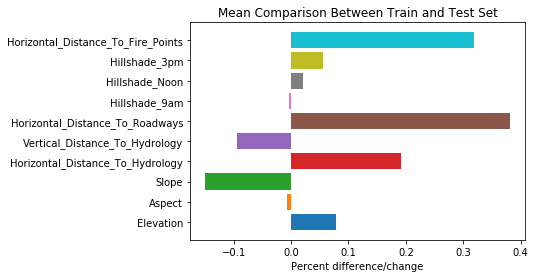

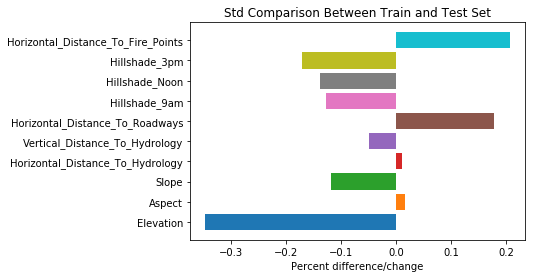

In [11]:
print('Positive values represent higher test set values.')
print('Negative values represent lower test set values')
print('Values near zero show negligible differences between test and train set.')

for i in ['mean','std']:
    print('')
    for c in diff_stats:
        plt.barh(c,diff_stats[c][i]/train_stats[c][i])
        plt.title(i.capitalize() + ' Comparison Between Train and Test Set')
        plt.xlabel('Percent difference/change')
    plt.show()

In [20]:
wild = ['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
for w in wild:
    print('Train ', w, round((train[w].sum()/len(train)),2))
    print('Test  ', w, round((test[w].sum()/len(test)),2))
    print('')

Train  Wilderness_Area1 0.24
Test   Wilderness_Area1 0.45

Train  Wilderness_Area2 0.03
Test   Wilderness_Area2 0.05

Train  Wilderness_Area3 0.42
Test   Wilderness_Area3 0.44

Train  Wilderness_Area4 0.31
Test   Wilderness_Area4 0.06



Findings: Test set has a greater proportion of records in Wilderness Area 1, and less in Wilderness Area 4

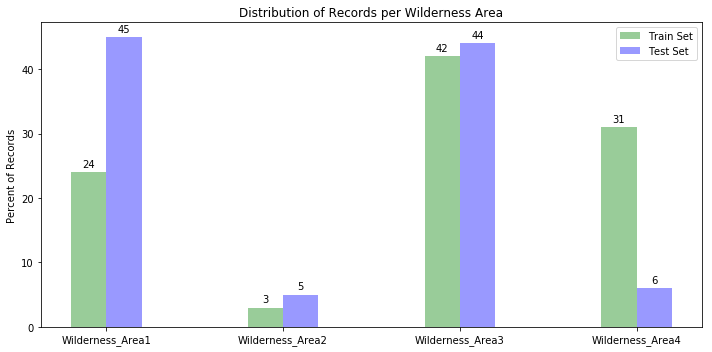

In [66]:
width = 0.20
labels = ['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, [24,3,42,31], width, label='Train Set', color= 'green', alpha=0.4)
rects2 = ax.bar(x + width/2, [45,5,44,6], width, label='Test Set', color= 'blue', alpha=0.4)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of Records')
ax.set_title('Distribution of Records per Wilderness Area')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Krummholz  :  (545, 252, 1363, 0)
Spruce/Fir :  (1062, 181, 917, 0)
Lodgepole  :  (1134, 66, 940, 20)
Aspen      :  (856, 0, 1304, 0)
Douglas    :  (0, 0, 962, 1198)
Ponderosa  :  (0, 0, 863, 1297)
Willow     :  (0, 0, 0, 2160)


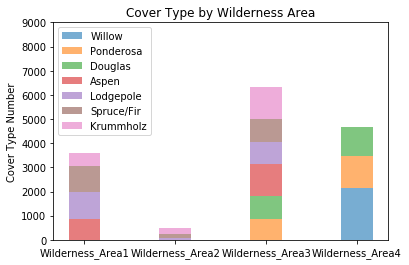

In [122]:
import numpy as np
import matplotlib.pyplot as plt

Cover_Type = {1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas Fir', 7: 'Krummholz'}
Cover_Type_lst = ['Fir','Lodgepole','Ponderosa','Willow','Aspen','Douglas','Krummholz']

N = 4

ind = np.arange(N)

wa1 = train[train.Wilderness_Area1==True]
wa2 = train[train.Wilderness_Area2==True]
wa3 = train[train.Wilderness_Area3==True]
wa4 = train[train.Wilderness_Area4==True]

ct1 = (len(wa1[wa1.Cover_Type==1]), len(wa2[wa2.Cover_Type==1]), len(wa3[wa3.Cover_Type==1]), len(wa4[wa4.Cover_Type==1]))
ct2 = (len(wa1[wa1.Cover_Type==2]), len(wa2[wa2.Cover_Type==2]), len(wa3[wa3.Cover_Type==2]), len(wa4[wa4.Cover_Type==2]))
ct3 = (len(wa1[wa1.Cover_Type==3]), len(wa2[wa2.Cover_Type==3]), len(wa3[wa3.Cover_Type==3]), len(wa4[wa4.Cover_Type==3]))
ct4 = (len(wa1[wa1.Cover_Type==4]), len(wa2[wa2.Cover_Type==4]), len(wa3[wa3.Cover_Type==4]), len(wa4[wa4.Cover_Type==4]))                                                                       
ct5 = (len(wa1[wa1.Cover_Type==5]), len(wa2[wa2.Cover_Type==5]), len(wa3[wa3.Cover_Type==5]), len(wa4[wa4.Cover_Type==5]))
ct6 = (len(wa1[wa1.Cover_Type==6]), len(wa2[wa2.Cover_Type==6]), len(wa3[wa3.Cover_Type==6]), len(wa4[wa4.Cover_Type==6]))
ct7 = (len(wa1[wa1.Cover_Type==7]), len(wa2[wa2.Cover_Type==7]), len(wa3[wa3.Cover_Type==7]), len(wa4[wa4.Cover_Type==7]))
width = 0.35       # the width of the bars: can also be len(x) sequence

print('Krummholz  : ', ct7)
print('Spruce/Fir : ', ct1)
print('Lodgepole  : ', ct2)
print('Aspen      : ', ct5)
print('Douglas    : ', ct6)
print('Ponderosa  : ', ct3)
print('Willow     : ', ct4)



p4 = plt.bar(ind, ct4, width, alpha=0.6)
p3 = plt.bar(ind, ct3, width, bottom = ct4, alpha=0.6)
p6 = plt.bar(ind, ct6, width, bottom = [sum(x) for x in zip(ct3,ct4)], alpha=0.6)
p5 = plt.bar(ind, ct5, width, bottom = [sum(x) for x in zip(ct3,ct4,ct6)],alpha=0.6)
p2 = plt.bar(ind, ct2, width, bottom = [sum(x) for x in zip(ct3,ct4,ct6,ct5)], alpha = 0.6)     
p1 = plt.bar(ind, ct1, width, bottom = [sum(x) for x in zip(ct3,ct4,ct6,ct5,ct2)], alpha = 0.6)
p7 = plt.bar(ind, ct7, width, bottom = [sum(x) for x in zip(ct3,ct4,ct6,ct5,ct2,ct1)],  alpha = 0.6)

plt.ylabel('Cover Type Number')
plt.title('Cover Type by Wilderness Area')
plt.xticks(ind, ('Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'))
plt.yticks(np.arange(0,10000,1000))

plt.legend((p4[0], p3[0], p6[0],p5[0],p2[0],p1[0],p7[0]), ('Willow','Ponderosa','Douglas','Aspen','Lodgepole','Spruce/Fir','Krummholz'))

plt.show()



Findings: 
> 90% of test set is in Wilderness Area 1 and 3

> 10% remaining is evenly split (~ 5% each) over Areas 2 and 4


## Data QC

### Missing Values

In [123]:
print('Any missing values in training data? ',train.isna().any().any())
print('Any missing values in test data? ', test.isna().any().any())

Any missing values in training data?  False
Any missing values in test data?  False


## Feature by Feature Exploration

In [124]:
# Make a new feature to visualize relationship with wilderness areas
train['Wilderness_Area'] = train.Wilderness_Area1+2*train.Wilderness_Area2+3*train.Wilderness_Area3+4*train.Wilderness_Area4
train['Wilderness_Area'] = train['Wilderness_Area'].astype('int')

test['Wilderness_Area'] = test.Wilderness_Area1+2*test.Wilderness_Area2+3*test.Wilderness_Area3+4*test.Wilderness_Area4
test['Wilderness_Area'] = test['Wilderness_Area'].astype('int')




In [125]:
# Create a function to automate the visualization of features for QC and analysis
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
def visualize_feature(feature, target, feature2):
    
    # create a dictionary to refer to cover types
    Cover_Type = {1: 'Spruce/Fir', 2: 'Lodgepole Pine', 3: 'Ponderosa Pine', 4: 'Cottonwood/Willow', 5: 'Aspen', 6: 'Douglas Fir', 7: 'Krummholz'}
    Cover_Type_lst = ['Fir','Lodgepole','Ponderosa','Willow','Aspen','Douglas','Krummholz']
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=False,figsize=(20,5))

    ax1.grid(True,axis='x',ls='--')
    ax1.hist(train[feature], bins=100,label='train set',color='green',alpha=0.4,density=True)
    ax1.hist(test[feature], bins=100,label='test set', color='blue',alpha=0.4,density=True)
    ax1.set_title('Histogram: '+ str(feature))
    ax1.set_xlabel(str(feature))
    ax1.legend()

    ax2.grid(True,axis='x',ls='--')
    ax2.scatter(train[feature],train[target],c=train[target])
    ax2.set_title(str(feature)+ ' vs. '+ str(target))
    ax2.set_xlabel(str(feature))
    ax2.set_ylabel(Cover_Type_lst)
    
  #  Axes.violinplot(self, dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None, *, data=None)[source]¶
    ax3.grid(True,axis='x',ls='--')
    ax3.scatter(train[feature],train[feature2], c=train[target],alpha=0.4)
    ax3.set_title(str(feature2)+ ' vs. '+ str(feature))
    ax3.set_xlabel(str(feature)); ax3.set_ylabel(str(feature2)); 
    
    ax4.grid(True,axis='x',ls='--')
    ax4.scatter(train[feature], train['Elevation'], c=train[target],alpha=0.4)
    ax4.set_title(str(feature)+ ' vs. '+ str('Elevation'))
    ax4.set_xlabel(str(feature))
    ax4.set_ylabel(str('Elevation')) 
    
   
    plt.show()

### 1. Elevation - Data Exploration

Findings:
- Elevation distributions are starkly different in train and test sets.
- Elevation is the dominant raw feature, separating cover types fairly well on its own.
New Feature Calculated:
Wilderness_Area -> Helpful for plotting categorical 

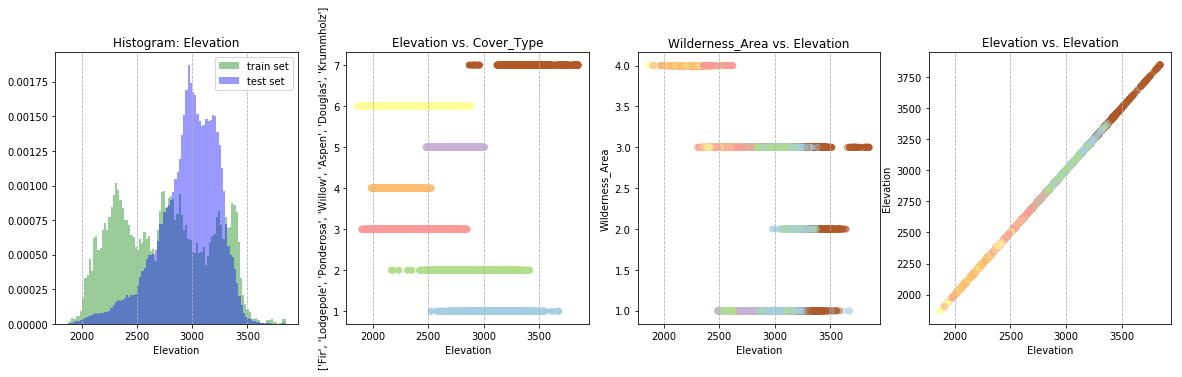

In [126]:
visualize_feature('Elevation','Cover_Type','Wilderness_Area')

### 2. Aspect - Data Exploration

- Conclusions: Aspect is not relevant to Forest Cover
- Proof below

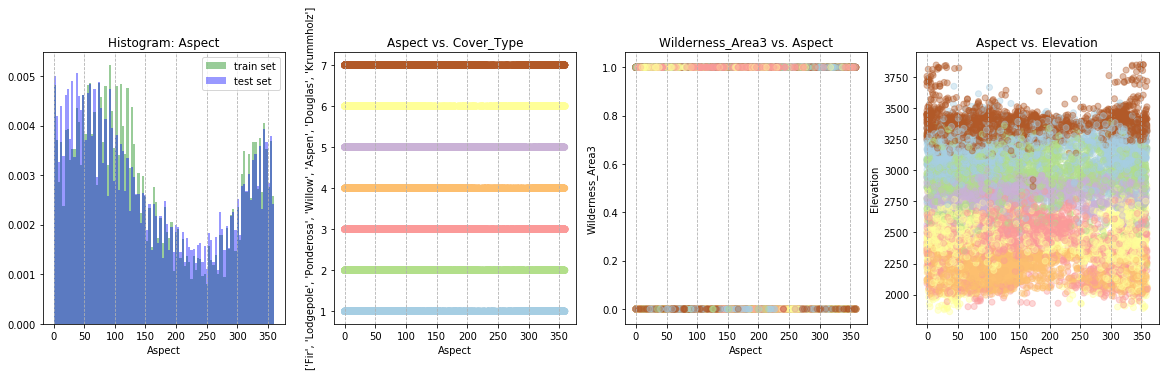

In [127]:
visualize_feature('Aspect','Cover_Type','Wilderness_Area3')

In [128]:
Cover_Type

{1: 'Spruce/Fir',
 2: 'Lodgepole Pine',
 3: 'Ponderosa Pine',
 4: 'Cottonwood/Willow',
 5: 'Aspen',
 6: 'Douglas Fir',
 7: 'Krummholz'}

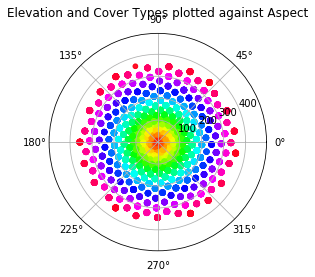

In [129]:
from matplotlib.pyplot import polar

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(train.Aspect, train.Aspect, c=train.Aspect, s=train.Elevation/100, cmap='hsv', alpha=0.75)
ax.set_title('Elevation and Cover Types plotted against Aspect')
plt.show()

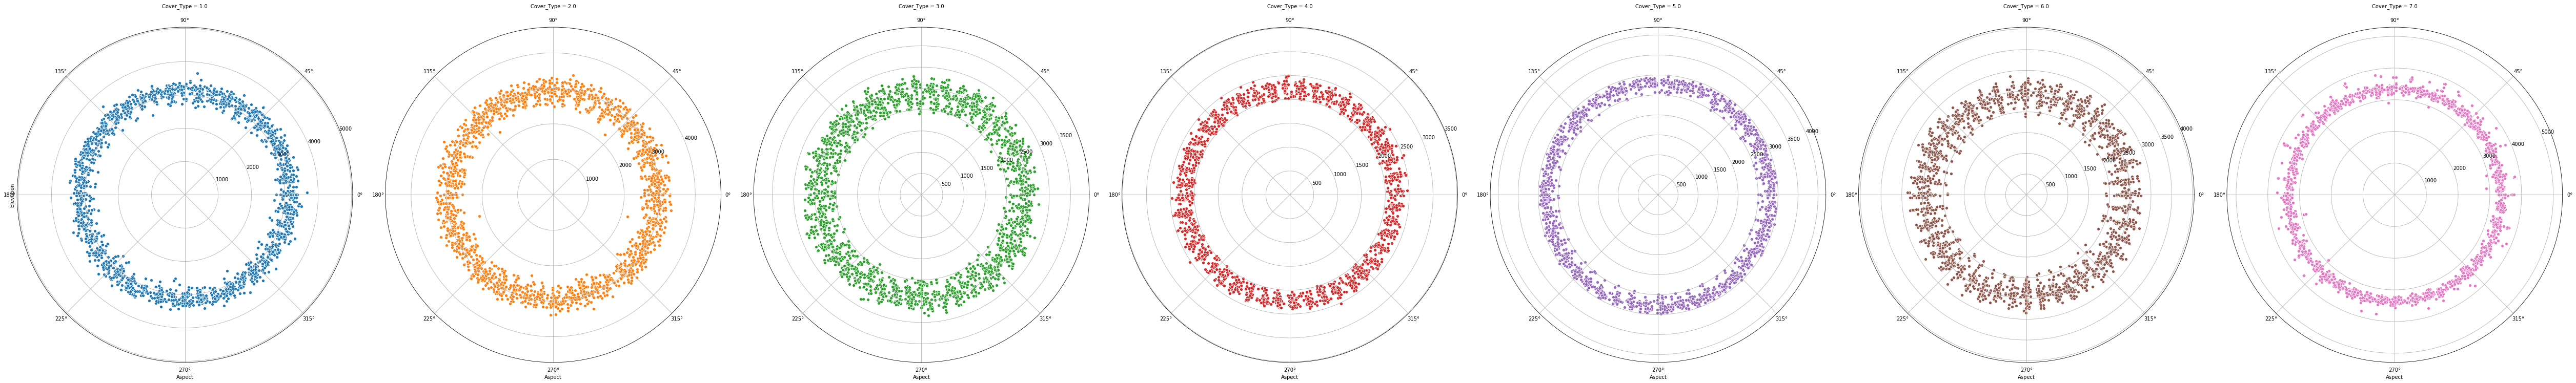

In [130]:
# aspect
g = sns.FacetGrid(train, col="Cover_Type", hue="Cover_Type",
                  subplot_kws=dict(projection='polar'), height=10,
                  sharex=False, sharey=False, despine=False)

# Draw a scatterplot onto each axes in the grid
g.map(sns.scatterplot, "Aspect", "Elevation")

### 3. Slope - Data Exploration

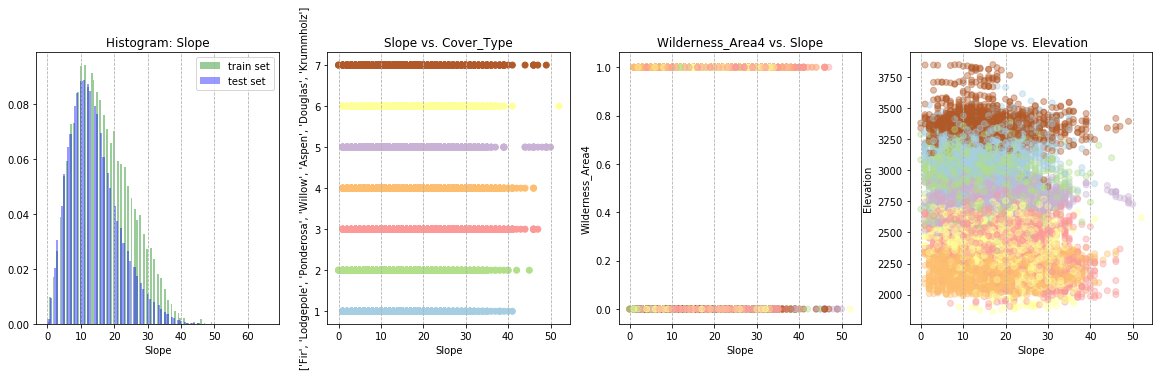

In [131]:
visualize_feature('Slope','Cover_Type','Wilderness_Area4')

### 4 & 5 Horizontal / Vertical Distance to Hydrology - Data Exploration

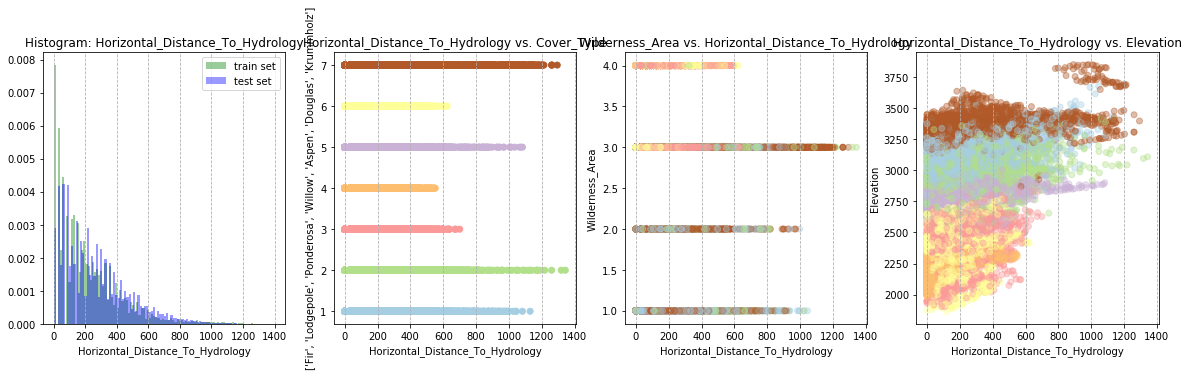

In [132]:
visualize_feature('Horizontal_Distance_To_Hydrology','Cover_Type','Wilderness_Area')

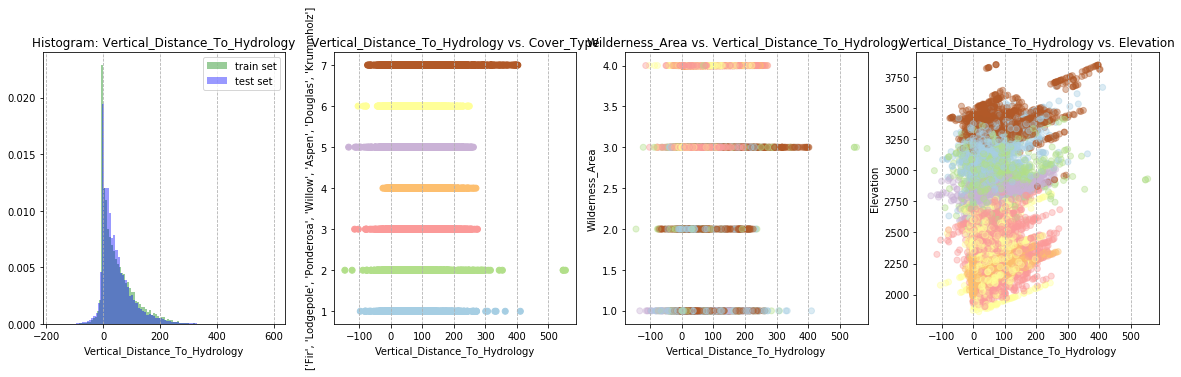

In [133]:
visualize_feature('Vertical_Distance_To_Hydrology','Cover_Type','Wilderness_Area')

### 6. Absolute Distance to Hydrology

In [134]:
# feature engineering 
hv = (train.Horizontal_Distance_To_Hydrology)**2, (train.Vertical_Distance_To_Hydrology)**2

c = train.Horizontal_Distance_To_Hydrology - train.Horizontal_Distance_To_Hydrology
for i in range(1,len(train)-1):
   c[i] = np.sqrt(hv[0][i] + hv[1][i])  # sqrt to find distance between points



train['Absolute_Distance_to_Hydrology'] = c

In [135]:
hvt = test.Horizontal_Distance_To_Hydrology**2, test.Vertical_Distance_To_Hydrology**2

d = test.Horizontal_Distance_To_Hydrology - test.Horizontal_Distance_To_Hydrology
for i in range(15121,15121+len(test)-1):
   d[i] = np.sqrt(hvt[0][i] + hvt[1][i])  # sqrt to find distance between points



test['Absolute_Distance_to_Hydrology'] = d

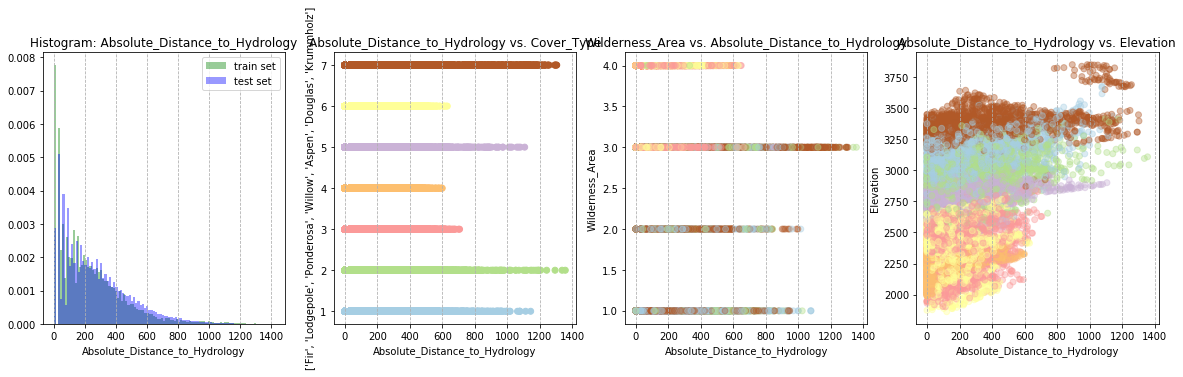

In [136]:
visualize_feature('Absolute_Distance_to_Hydrology','Cover_Type','Wilderness_Area')

### 7,8, & 9. Hillshade 9 am, Noon, 3pm

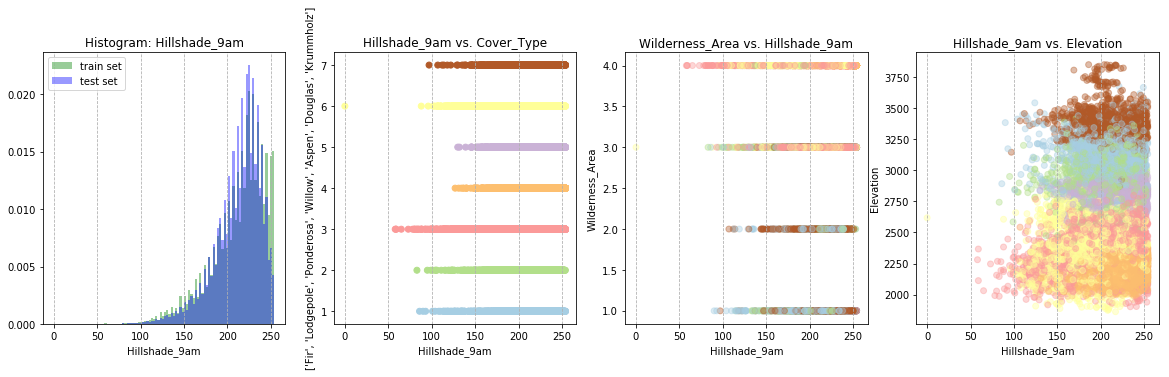

In [137]:
visualize_feature('Hillshade_9am','Cover_Type','Wilderness_Area')

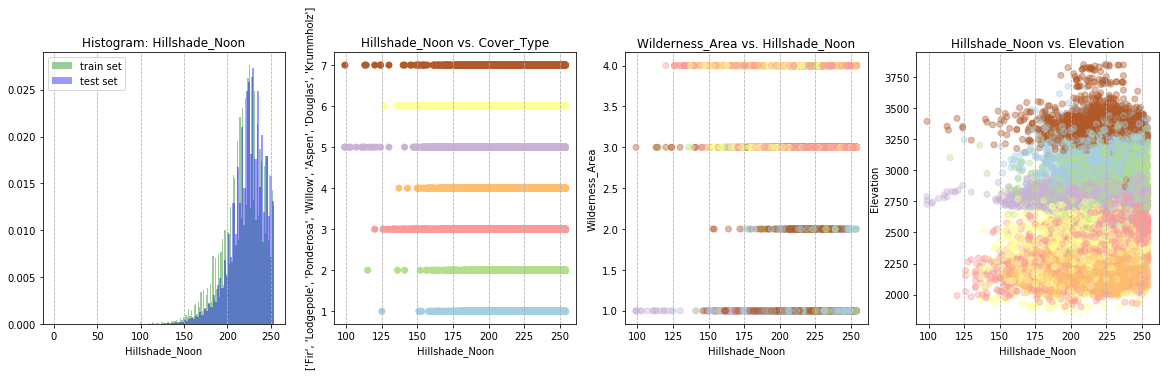

In [138]:
visualize_feature('Hillshade_Noon','Cover_Type','Wilderness_Area')

> Domain knowledge: Douglas fir prefers full to partial shade. 

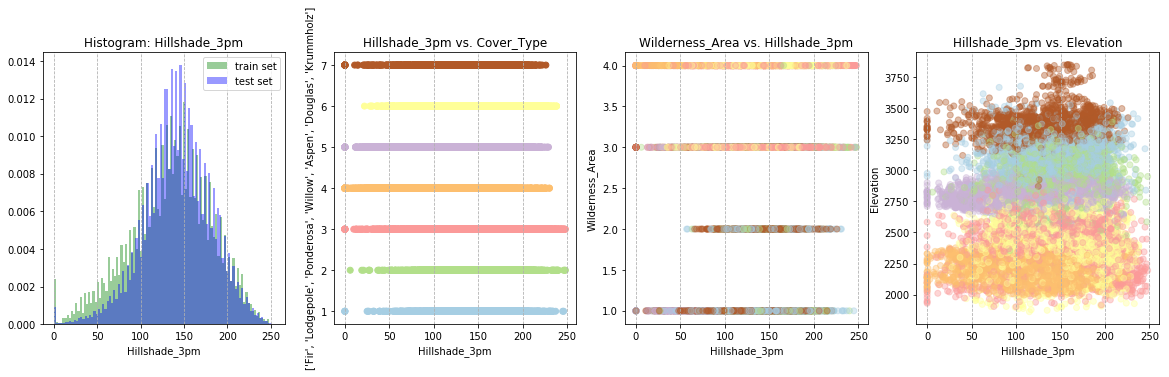

In [139]:
visualize_feature('Hillshade_3pm','Cover_Type','Wilderness_Area')

### 10. Total Light Exposure

In [140]:
hill_df = pd.DataFrame([train.Hillshade_9am,train.Hillshade_Noon,train.Hillshade_3pm])
hill_df = hill_df.T
hill_df['Hillshade_6am'] = train.Hillshade_9am - train.Hillshade_9am
hill_df['Hillshade_6pm'] = train.Hillshade_9am - train.Hillshade_9am
hill_df = hill_df.T
hill_df.head()

hill_df2 = pd.DataFrame([test.Hillshade_9am,test.Hillshade_Noon,test.Hillshade_3pm])
hill_df2 = hill_df2.T
hill_df2['Hillshade_6am'] = test.Hillshade_9am - test.Hillshade_9am
hill_df2['Hillshade_6pm'] = test.Hillshade_9am - test.Hillshade_9am
hill_df2 = hill_df2.T
hill_df2.head()

Id              15121.0   15122.0   15123.0   15124.0   15125.0   15126.0   \
Hillshade_9am      196.0     201.0     206.0     208.0     210.0     206.0   
Hillshade_Noon     214.0     216.0     208.0     201.0     195.0     200.0   
Hillshade_3pm      156.0     152.0     137.0     125.0     115.0     127.0   
Hillshade_6am        0.0       0.0       0.0       0.0       0.0       0.0   
Hillshade_6pm        0.0       0.0       0.0       0.0       0.0       0.0   

Id              15127.0   15128.0   15129.0   15130.0     ...     581003.0  \
Hillshade_9am      202.0     202.0     208.0     205.0    ...        230.0   
Hillshade_Noon     202.0     207.0     211.0     209.0    ...        240.0   
Hillshade_3pm      133.0     140.0     138.0     138.0    ...        126.0   
Hillshade_6am        0.0       0.0       0.0       0.0    ...          0.0   
Hillshade_6pm        0.0       0.0       0.0       0.0    ...          0.0   

Id              581004.0  581005.0  581006.0  581007.0  581008.0  581009.0  \
Hillshade_9am      236.0     238.0     237.0     238.0     240.0     240.0   
Hillshade_Noon     237.0     236.0     238.0     238.0     237.0     237.0   
Hillshade_3pm      116.0     115.0     119.0     119.0     118.0     119.0   
Hillshade_6am        0.0       0.0       0.0       0.0       0.0       0.0   
Hillshade_6pm        0.0       0.0       0.0       0.0       0.0       0.0   

Id              581010.0  581011.0  581012.0  
Hillshade_9am      236.0     230.0     231.0  
Hillshade_Noon     241.0     245.0     244.0  
Hillshade_3pm      130.0     143.0     141.0  
Hillshade_6am        0.0       0.0       0.0  
Hillshade_6pm        0.0       0.0       0.0  

[5 rows x 565892 columns]

In [141]:
hill_df.index =[3,6,9,0,12]
hill_df.columns = hill_df.columns.astype('int')


hill_df2.index =[3,6,9,0,12]
hill_df2.columns = hill_df2.columns.astype('int')
hill_df2

Id  15121   15122   15123   15124   15125   15126   15127   15128   15129   \
3    196.0   201.0   206.0   208.0   210.0   206.0   202.0   202.0   208.0   
6    214.0   216.0   208.0   201.0   195.0   200.0   202.0   207.0   211.0   
9    156.0   152.0   137.0   125.0   115.0   127.0   133.0   140.0   138.0   
0      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Id  15130    ...    581003  581004  581005  581006  581007  581008  581009  \
3    205.0   ...     230.0   236.0   238.0   237.0   238.0   240.0   240.0   
6    209.0   ...     240.0   237.0   236.0   238.0   238.0   237.0   237.0   
9    138.0   ...     126.0   116.0   115.0   119.0   119.0   118.0   119.0   
0      0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
12     0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Id  581010  581011  581012  
3    236.0   230.0   231.0  
6    241.0   245.0   244.0  
9    130.0   143.0   141.0  
0      0.0     0.0     0.0  
12     0.0     0.0     0.0  

[5 rows x 565892 columns]

In [142]:
# typical mode
hill_df = hill_df.sort_index()

hill_df2 =  hill_df2.sort_index()

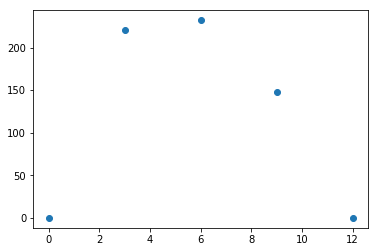

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = list(hill_df.index)
y = list(hill_df[1])

plt.scatter(X,y)


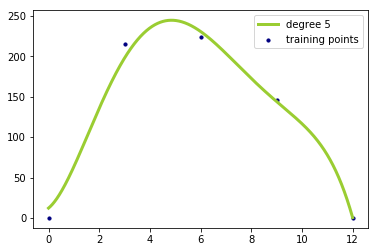

In [144]:
# generate a polynomial regression model to approximate total exposure to sunlight.

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# generate points used to plot
x_plot = np.arange(0,12,0.001)

# generate points and keep a subset of them

x = np.array([0,3,6,9,12])
y = hill_df[2000]

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 3
plt.scatter(x, y, color='navy', s=10, marker='o', label="training points")

#for count, degree in enumerate([5]):
model = make_pipeline(PolynomialFeatures(degree=5), Ridge())
model.fit(X, y)
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot, color=colors[1], linewidth=lw,
         label="degree %d" % 5)

plt.legend(loc='upper right')

plt.show()

In [145]:
# calculate light exposure for training set
light_list = []

for i in range(len(train)):
    # generate points used to plot
    x_plot = np.arange(0,12,0.001)

    # generate points and keep a subset of them

    x = np.array([0,3,6,9,12])
    y = hill_df[i+1]

    # create matrix versions of these arrays
    X = x[:, np.newaxis]
    X_plot = x_plot[:, np.newaxis]

    model = make_pipeline(PolynomialFeatures(degree=5), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    
    light_list.append(int(np.sum(y_plot)))
# add light exposure as a new column
train['Light_Exposure'] = light_list

train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                
1.0     2596.0    51.0    3.0                             258.0   
2.0     2590.0    56.0    2.0                             212.0   
3.0     2804.0   139.0    9.0                             268.0   
4.0     2785.0   155.0   18.0                             242.0   
5.0     2595.0    45.0    2.0                             153.0   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                     
1.0                             0.0                            510.0   
2.0                            -6.0                            390.0   
3.0                            65.0                           3180.0   
4.0                           118.0                           3090.0   
5.0                            -1.0                            391.0   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                  
1.0          221.0           232.0          148.0   
2.0          220.0           235.0          151.0   
3.0          234.0           238.0          135.0   
4.0          238.0           238.0          122.0   
5.0          220.0           234.0          150.0   

     Horizontal_Distance_To_Fire_Points       ...        Soil_Type35  \
Id                                            ...                      
1.0                              6279.0       ...                0.0   
2.0                              6225.0       ...                0.0   
3.0                              6121.0       ...                0.0   
4.0                              6211.0       ...                0.0   
5.0                              6172.0       ...                0.0   

     Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  \
Id                                                                     
1.0          0.0          0.0          0.0          0.0          0.0   
2.0          0.0          0.0          0.0          0.0          0.0   
3.0          0.0          0.0          0.0          0.0          0.0   
4.0          0.0          0.0          0.0          0.0          0.0   
5.0          0.0          0.0          0.0          0.0          0.0   

     Cover_Type  Wilderness_Area  Absolute_Distance_to_Hydrology  \
Id                                                                 
1.0         5.0                1                      258.000000   
2.0         5.0                1                      212.084889   
3.0         2.0                1                      275.769832   
4.0         2.0                1                      269.235956   
5.0         5.0                1                      153.003268   

     Light_Exposure  
Id                   
1.0         1885025  
2.0         1899120  
3.0         1890883  
4.0         1851477  
5.0         1893138  

[5 rows x 58 columns]

In [146]:
hill_df2

Id  15121   15122   15123   15124   15125   15126   15127   15128   15129   \
0      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    196.0   201.0   206.0   208.0   210.0   206.0   202.0   202.0   208.0   
6    214.0   216.0   208.0   201.0   195.0   200.0   202.0   207.0   211.0   
9    156.0   152.0   137.0   125.0   115.0   127.0   133.0   140.0   138.0   
12     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Id  15130    ...    581003  581004  581005  581006  581007  581008  581009  \
0      0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3    205.0   ...     230.0   236.0   238.0   237.0   238.0   240.0   240.0   
6    209.0   ...     240.0   237.0   236.0   238.0   238.0   237.0   237.0   
9    138.0   ...     126.0   116.0   115.0   119.0   119.0   118.0   119.0   
12     0.0   ...       0.0     0.0     0.0     0.0     0.0     0.0     0.0   

Id  581010  581011  581012  
0      0.0     0.0     0.0  
3    236.0   230.0   231.0  
6    241.0   245.0   244.0  
9    130.0   143.0   141.0  
12     0.0     0.0     0.0  

[5 rows x 565892 columns]

In [147]:
light_list = []

for i in range(15121, 15121 + len(test)):
    # generate points used to plot
    x_plot = np.arange(0,12,0.001)

    # generate points and keep a subset of them

    x = np.array([0,3,6,9,12])
    y = hill_df2[i]

    # create matrix versions of these arrays
    X = x[:, np.newaxis]
    X_plot = x_plot[:, np.newaxis]

    model = make_pipeline(PolynomialFeatures(degree=5), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    
    light_list.append(int(np.sum(y_plot)))
    
# add light exposure as a new column
test['Light_Exposure'] = light_list

test.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                    
15121.0     2680.0   354.0   14.0                               0.0   
15122.0     2683.0     0.0   13.0                               0.0   
15123.0     2713.0    16.0   15.0                               0.0   
15124.0     2709.0    24.0   17.0                               0.0   
15125.0     2706.0    29.0   19.0                               0.0   

         Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                         
15121.0                             0.0                           2684.0   
15122.0                             0.0                           2654.0   
15123.0                             0.0                           2980.0   
15124.0                             0.0                           2950.0   
15125.0                             0.0                           2920.0   

         Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                      
15121.0          196.0           214.0          156.0   
15122.0          201.0           216.0          152.0   
15123.0          206.0           208.0          137.0   
15124.0          208.0           201.0          125.0   
15125.0          210.0           195.0          115.0   

         Horizontal_Distance_To_Fire_Points       ...        Soil_Type34  \
Id                                                ...                      
15121.0                              6645.0       ...                0.0   
15122.0                              6675.0       ...                0.0   
15123.0                              6344.0       ...                0.0   
15124.0                              6374.0       ...                0.0   
15125.0                              6404.0       ...                0.0   

         Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
Id                                                                         
15121.0          0.0          0.0          0.0          0.0          0.0   
15122.0          0.0          0.0          0.0          0.0          0.0   
15123.0          0.0          0.0          0.0          0.0          0.0   
15124.0          0.0          0.0          0.0          0.0          0.0   
15125.0          0.0          0.0          0.0          0.0          0.0   

         Soil_Type40  Wilderness_Area  Absolute_Distance_to_Hydrology  \
Id                                                                      
15121.0          0.0                1                             0.0   
15122.0          0.0                1                             0.0   
15123.0          0.0                1                             0.0   
15124.0          0.0                1                             0.0   
15125.0          0.0                1                             0.0   

         Light_Exposure  
Id                       
15121.0         1790670  
15122.0         1796596  
15123.0         1738483  
15124.0         1683229  
15125.0         1638174  

[5 rows x 57 columns]

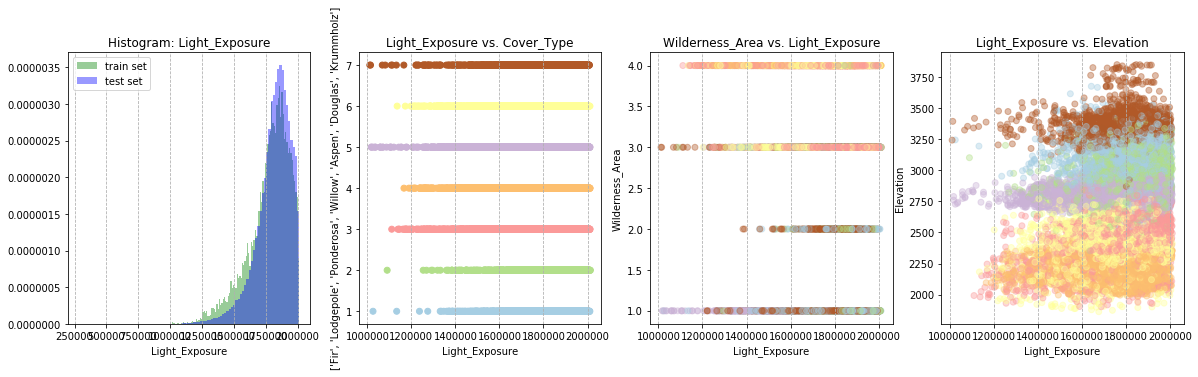

In [148]:
visualize_feature('Light_Exposure','Cover_Type','Wilderness_Area')

### 11. Horizontal Distance to Roadways

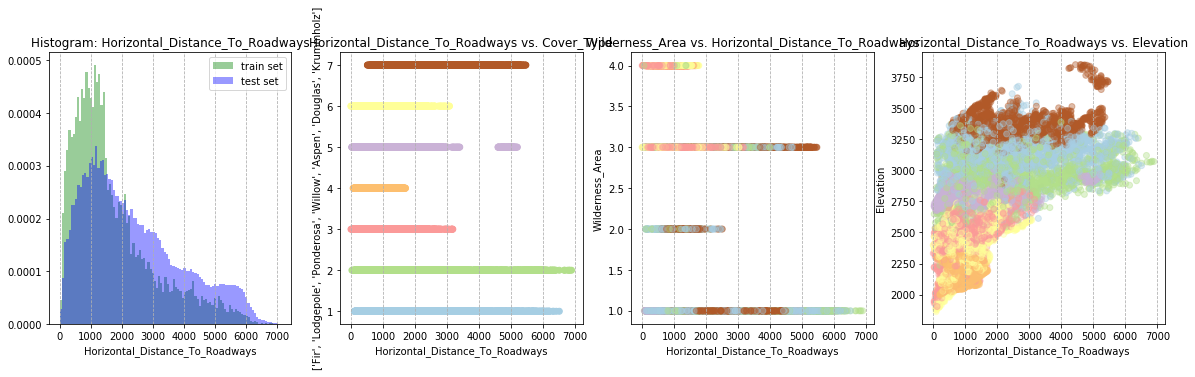

In [149]:
visualize_feature('Horizontal_Distance_To_Roadways','Cover_Type','Wilderness_Area')

### 12. Horizontal Distance to Fire Points

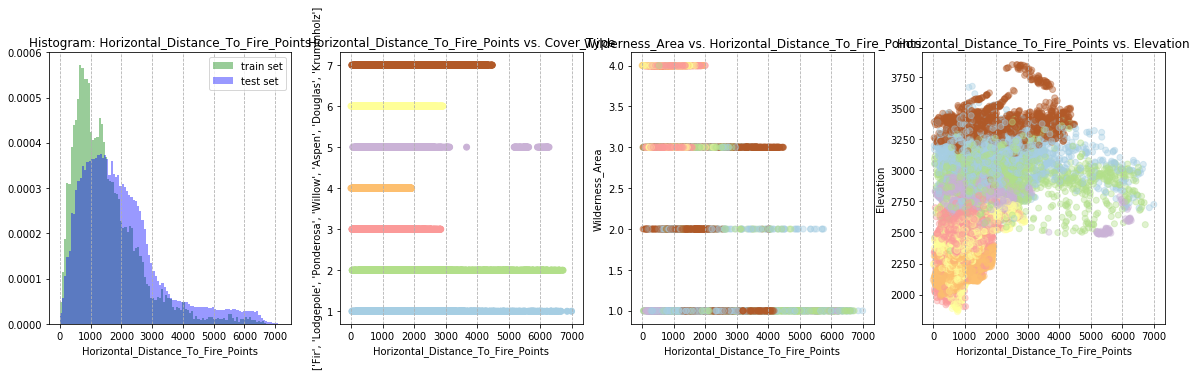

In [150]:
visualize_feature('Horizontal_Distance_To_Fire_Points','Cover_Type','Wilderness_Area')

### 13. Wilderness Area

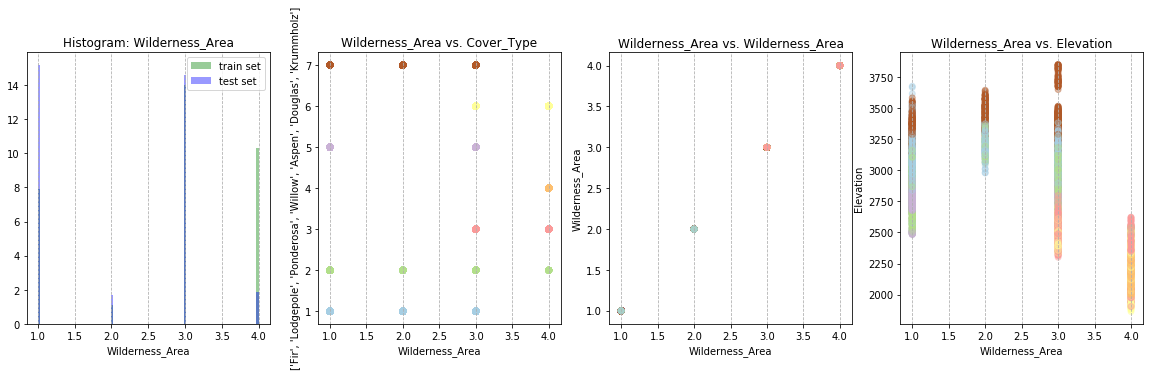

In [151]:
visualize_feature('Wilderness_Area','Cover_Type','Wilderness_Area')

### 14. Soil Lithics

In [152]:
# The work to develop this table was done outside of this notebook using domain information researched. These
# values in some cases are approximate
soil_properties_df = pd.read_csv('Soils/Sheet 3-Table 1.csv')
soil_properties_df.head()

Unnamed: 0  Soil_Lithics  Soil_Drainage  Soil_Depth  Rocky_Terrain
0  Soil_Type1             3              3           0              2
1  Soil_Type2             2              2           1              0
2  Soil_Type3             5              2           2              2
3  Soil_Type4             5              2           1              2
4  Soil_Type5             5              2           1              2

In [153]:
soil_properties_df.Soil_Lithics.unique()

array([3, 2, 5, 1, 0, 4])

In [154]:
## transpose table, then make table columns = Unnamed, then 
soil_properties_df = soil_properties_df.T
soil_properties_df


0           1           2           3           4   \
Unnamed: 0     Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5   
Soil_Lithics            3           2           5           5           5   
Soil_Drainage           3           2           2           2           2   
Soil_Depth              0           1           2           1           1   
Rocky_Terrain           2           0           2           2           2   

                       5           6           7           8            9   \
Unnamed: 0     Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10   
Soil_Lithics            1           0           0           2            5   
Soil_Drainage           2           2           2           2            3   
Soil_Depth              1           4           1           3            1   
Rocky_Terrain           2           0           0           0            2   

                  ...                30           31           32  \
Unnamed: 0        ...       Soil_Type31  Soil_Type32  Soil_Type33   
Soil_Lithics      ...                 3            3            3   
Soil_Drainage     ...                 3            3            3   
Soil_Depth        ...                 1            0            1   
Rocky_Terrain     ...                 0            2            1   

                        33           34           35           36  \
Unnamed: 0     Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37   
Soil_Lithics             3            0            3            3   
Soil_Drainage            2            2            2            2   
Soil_Depth               0            0            1            1   
Rocky_Terrain            2            2            1            0   

                        37           38           39  
Unnamed: 0     Soil_Type38  Soil_Type39  Soil_Type40  
Soil_Lithics             3            3            3  
Soil_Drainage            1            2            4  
Soil_Depth               3            3            0  
Rocky_Terrain            0            0            1  

[5 rows x 40 columns]

In [157]:
train.columns[14:54]

Index(['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')

In [159]:
# Add column names properly
soil_properties_df.drop('Unnamed: 0',inplace=True)
soil_types_lst = train.columns[14:54]
soil_properties_df.columns = soil_types_lst
soil_properties_df

Soil_Type1 Soil_Type2 Soil_Type3 Soil_Type4 Soil_Type5  \
Soil_Lithics           3          2          5          5          5   
Soil_Drainage          3          2          2          2          2   
Soil_Depth             0          1          2          1          1   
Rocky_Terrain          2          0          2          2          2   

              Soil_Type6 Soil_Type7 Soil_Type8 Soil_Type9 Soil_Type10  \
Soil_Lithics           1          0          0          2           5   
Soil_Drainage          2          2          2          2           3   
Soil_Depth             1          4          1          3           1   
Rocky_Terrain          2          0          0          0           2   

                  ...     Soil_Type31 Soil_Type32 Soil_Type33 Soil_Type34  \
Soil_Lithics      ...               3           3           3           3   
Soil_Drainage     ...               3           3           3           2   
Soil_Depth        ...               1           0           1           0   
Rocky_Terrain     ...               0           2           1           2   

              Soil_Type35 Soil_Type36 Soil_Type37 Soil_Type38 Soil_Type39  \
Soil_Lithics            0           3           3           3           3   
Soil_Drainage           2           2           2           1           2   
Soil_Depth              0           1           1           3           3   
Rocky_Terrain           2           1           0           0           0   

              Soil_Type40  
Soil_Lithics            3  
Soil_Drainage           4  
Soil_Depth              0  
Rocky_Terrain           1  

[4 rows x 40 columns]

In [172]:
# create new columns in train set by calculating properties for entry based on soil type.
import operator 



for p in soil_properties_df.index:
    
    soil_property = list(train.Soil_Type1 - train.Soil_Type1) # list of zeros
    soil_property2 = list(test.Soil_Type1 - test.Soil_Type1) # list of zeros
    
    for s in soil_types_lst:
        property_ = list(train[s]*soil_properties_df[s][p])
        soil_property = list(map(operator.add,soil_property,property_))
        property_2 = list(test[s]*soil_properties_df[s][p])
        soil_property2 = list(map(operator.add,soil_property2,property_2))

    train[p] = soil_property
    test[p] = soil_property2
train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                                
1.0     2596.0    51.0    3.0                             258.0   
2.0     2590.0    56.0    2.0                             212.0   
3.0     2804.0   139.0    9.0                             268.0   
4.0     2785.0   155.0   18.0                             242.0   
5.0     2595.0    45.0    2.0                             153.0   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                     
1.0                             0.0                            510.0   
2.0                            -6.0                            390.0   
3.0                            65.0                           3180.0   
4.0                           118.0                           3090.0   
5.0                            -1.0                            391.0   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                  
1.0          221.0           232.0          148.0   
2.0          220.0           235.0          151.0   
3.0          234.0           238.0          135.0   
4.0          238.0           238.0          122.0   
5.0          220.0           234.0          150.0   

     Horizontal_Distance_To_Fire_Points      ...        Soil_Type39  \
Id                                           ...                      
1.0                              6279.0      ...                0.0   
2.0                              6225.0      ...                0.0   
3.0                              6121.0      ...                0.0   
4.0                              6211.0      ...                0.0   
5.0                              6172.0      ...                0.0   

     Soil_Type40  Cover_Type  Wilderness_Area  Absolute_Distance_to_Hydrology  \
Id                                                                              
1.0          0.0         5.0                1                      258.000000   
2.0          0.0         5.0                1                      212.084889   
3.0          0.0         2.0                1                      275.769832   
4.0          0.0         2.0                1                      269.235956   
5.0          0.0         5.0                1                      153.003268   

     Light_Exposure  Soil_Lithics  Soil_Drainage  Soil_Depth  Rocky_Terrain  
Id                                                                           
1.0         1885025           3.0            2.0         2.0            0.0  
2.0         1899120           3.0            2.0         2.0            0.0  
3.0         1890883           1.0            2.0         1.0            1.0  
4.0         1851477           3.0            2.0         1.0            1.0  
5.0         1893138           3.0            2.0         2.0            0.0  

[5 rows x 62 columns]

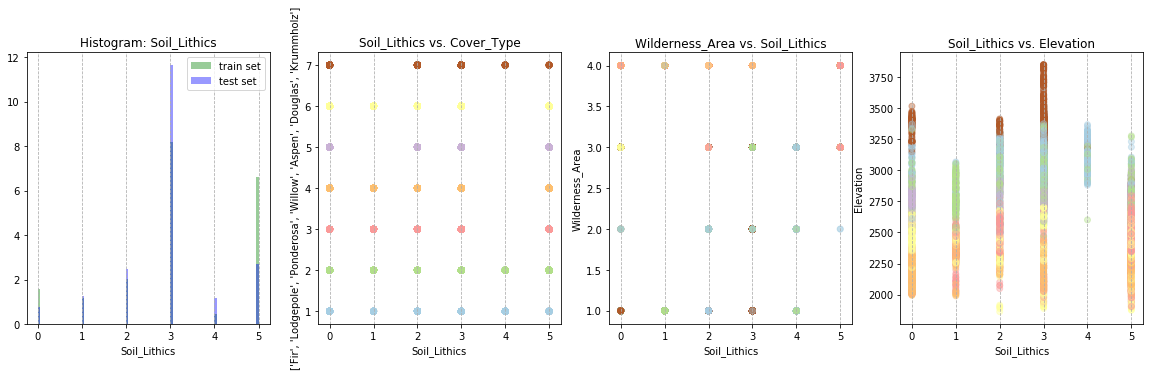

In [173]:
visualize_feature('Soil_Lithics','Cover_Type','Wilderness_Area')

### 15. Drainage

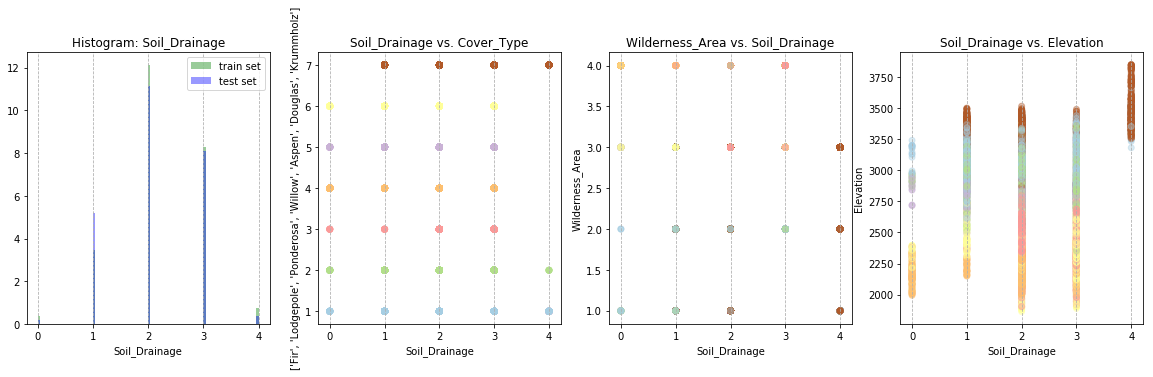

In [174]:
# compute based on soil characteristics - waterlogged, well drained, dry
visualize_feature('Soil_Drainage','Cover_Type','Wilderness_Area')

### 16. Soil Depth

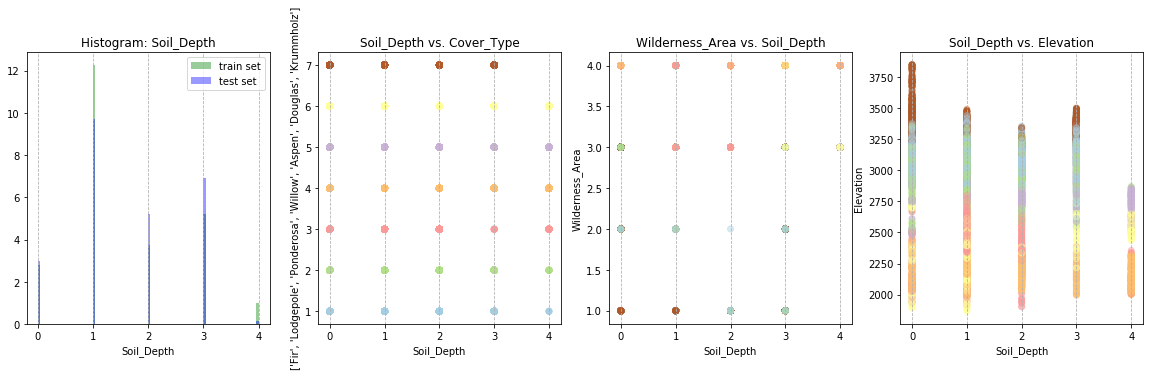

In [175]:
visualize_feature('Soil_Depth','Cover_Type','Wilderness_Area')

### 17. Rocky Terrain

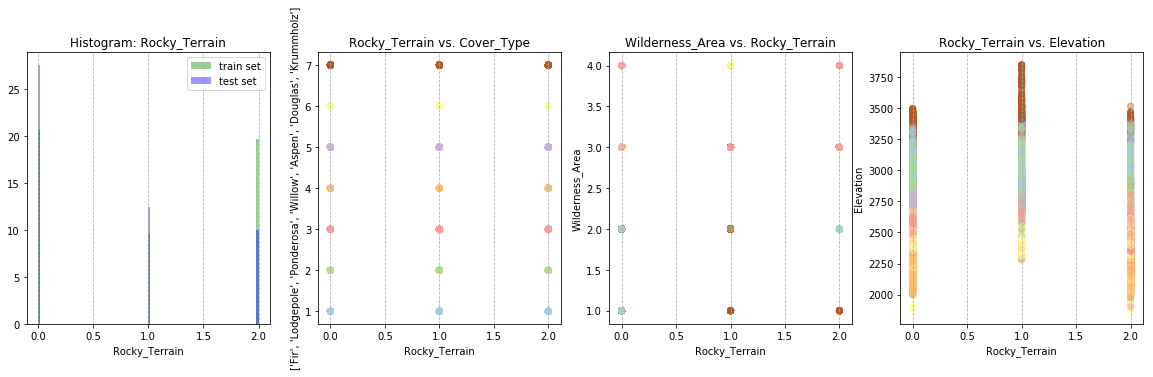

In [176]:
visualize_feature('Rocky_Terrain','Cover_Type','Wilderness_Area')

### More Feature Engineering

Controls on species growth:
    - Temperature: 
        - Elevation:                    higher-> colder
        - Hillshade/Light Exposure:     less -> colder
        - Aspect                        north aspect slopes -> colder than south (Create binary variable: NORTH SLOPE)
        - Aspect /Wind di
        
        rection        coming from west -> west aspect colder, too (Create binary variable: WEST SLOPE)
        - Slope                         higher slopes -> colder
    - Moisture:
        - Drainage                     more -> drier
        - Slope                        higher -> drier
        - Soil Lithics                 more -> drier
        - Rock face                    more -> drier
        - Aspect                       south -> drier, north -> wetter (less evaporation)
    - Light:
        - Light exposure               more -> brighter
        - Aspect                       south -> brighter
    
    - Soil
        - Depth
        - Slope                        steeper -> shallower
        - 

### Temperature Proxy

We converted aspect to north and south components. South should be hottest, North should be coldest.


Text(0.5, 1.0, 'Function to Convert Aspect to North and South Temperature Proxy.')

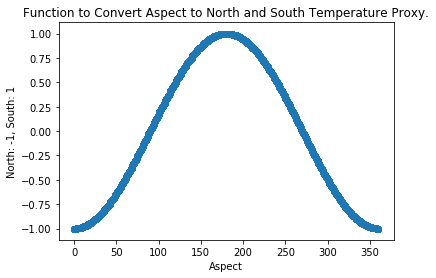

In [302]:
import math 
print('We converted aspect to north and south components. South should be hottest, North should be coldest.')
plt.scatter(train.Aspect,np.sin(((train.Aspect*math.pi/180)-(math.pi/2))))
plt.xlabel('Aspect')
plt.ylabel('North: -1, South: 1')
plt.title('Function to Convert Aspect to North and South Temperature Proxy.')

We converted aspect to East and West components. East should be hottest, West should be coldest.


Text(0.5, 1.0, 'Function to Convert Aspect to East and West Temperature Proxy.')

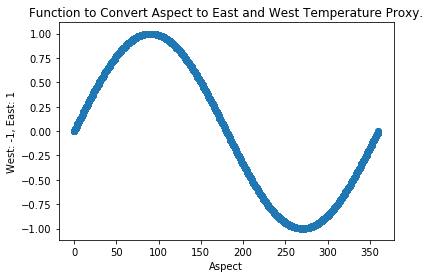

In [304]:
import math 
print('We converted aspect to East and West components. East should be hottest, West should be coldest.')
plt.scatter(train.Aspect,np.cos(((train.Aspect*math.pi/180)-(math.pi/2))))
plt.xlabel('Aspect')
plt.ylabel('West: -1, East: 1')
plt.title('Function to Convert Aspect to East and West Temperature Proxy.')

In [470]:
train['Temp_N_S'] = np.sin(((train.Aspect*math.pi/180)-(math.pi/2)))
test['Temp_N_S'] = np.sin(((test.Aspect*math.pi/180)-(math.pi/2)))
train['Temp_E_W'] = -1*np.cos(((train.Aspect*math.pi/180)-(math.pi/2)))
test['Temp_E_W'] = -1*np.cos(((test.Aspect*math.pi/180)-(math.pi/2)))

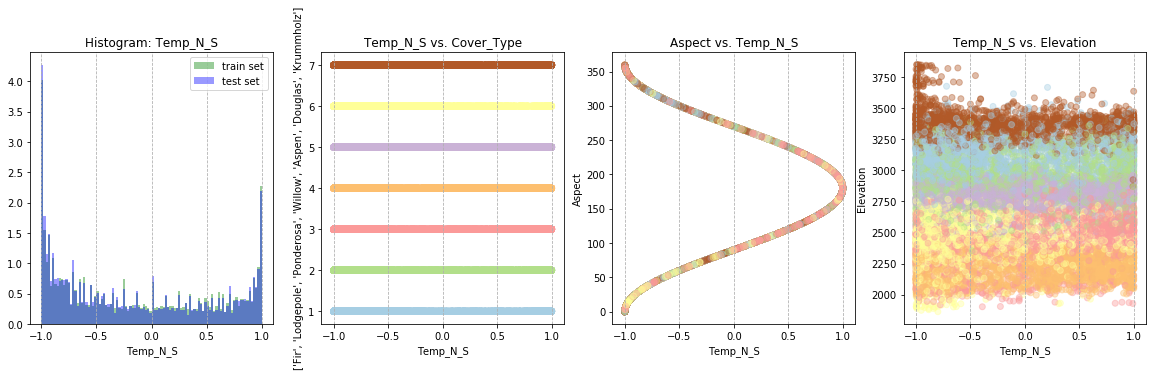

In [471]:
visualize_feature('Temp_N_S','Cover_Type','Aspect')

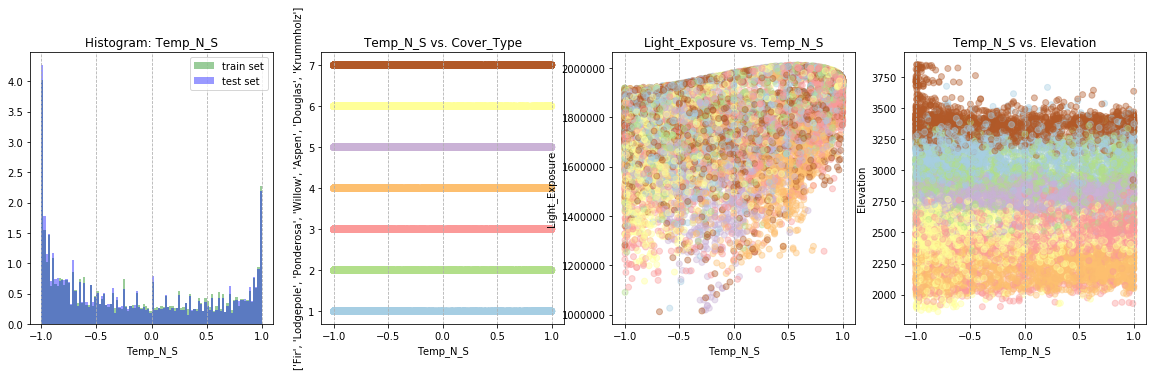

In [474]:
visualize_feature('Temp_N_S','Cover_Type','Light_Exposure')

In [520]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [521]:
train['Temperature_Proxy'] = (train.Light_Exposure/train.Light_Exposure.std()-train.Elevation/train.Elevation.std()+train.Temp_N_S+train.Soil_Drainage)
test['Temperature_Proxy'] = (test.Light_Exposure/train.Light_Exposure.std()-test.Elevation/test.Elevation.std()+test.Temp_N_S+test.Soil_Drainage)

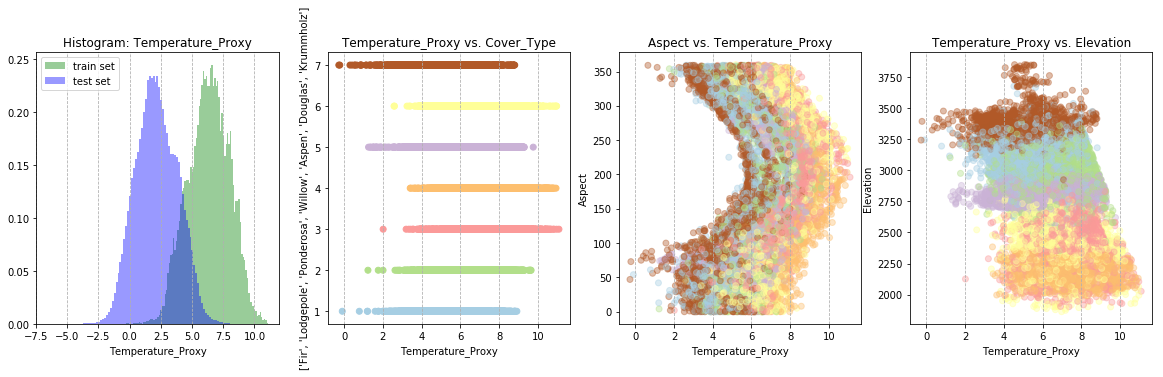

In [530]:
visualize_feature('Temperature_Proxy','Cover_Type','Aspect')

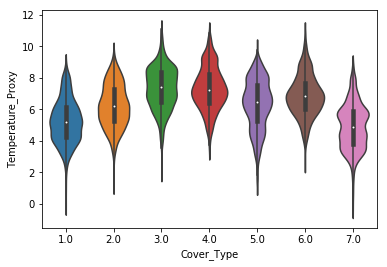

In [529]:
import seaborn as sns
sns.violinplot(train.Cover_Type,train.Temperature_Proxy)

### Moisture Proxy

In [551]:
train['Elev_Vhydro_diff'] = (train['Elevation']- train['Vertical_Distance_To_Hydrology'])
test['Elev_Vhydro_diff'] = (test['Elevation'] - test['Vertical_Distance_To_Hydrology'])

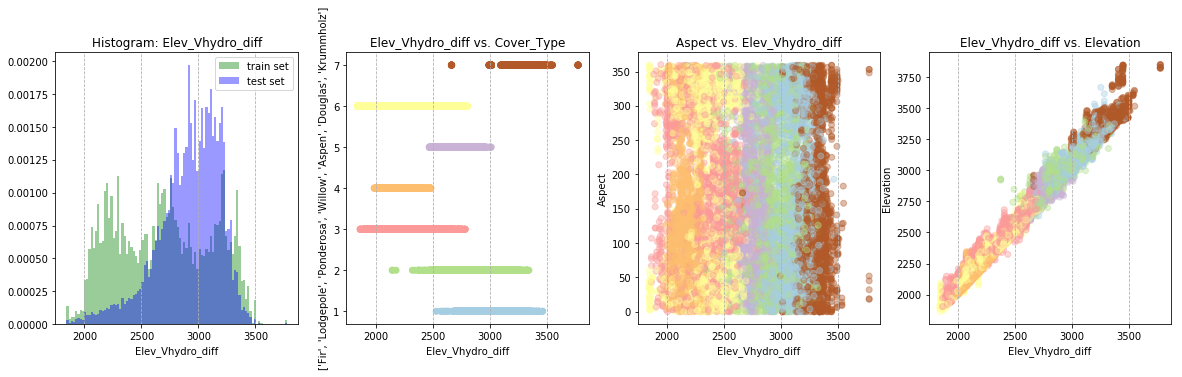

In [552]:
visualize_feature('Elev_Vhydro_diff','Cover_Type','Aspect')

### Other Features

In [554]:
train['Hhydro_Fire_sum'] = (train['Horizontal_Distance_To_Hydrology'] +  train['Horizontal_Distance_To_Fire_Points'])
test['Hhydro_Fire_sum'] = (test['Horizontal_Distance_To_Hydrology'] +  test['Horizontal_Distance_To_Fire_Points'])
                           
train['Hhydro_Fire_diff'] = (train['Horizontal_Distance_To_Hydrology'] -  train['Horizontal_Distance_To_Fire_Points']).abs()
test['Hhydro_Fire_diff'] = (test['Horizontal_Distance_To_Hydrology'] -  test['Horizontal_Distance_To_Fire_Points']).abs()
                           
train['Hhydro_Road_sum'] = (train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways'])
test['Hhydro_Road_sum'] = (test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways'])
                           
train['Hhydro_Road_diff'] = (train['Horizontal_Distance_To_Hydrology'] - train['Horizontal_Distance_To_Roadways']).abs()
test['Hhydro_Road_diff'] = (test['Horizontal_Distance_To_Hydrology'] - test['Horizontal_Distance_To_Roadways']).abs()

train['Road_Fire_sum'] = (train['Horizontal_Distance_To_Roadways'] +  train['Horizontal_Distance_To_Fire_Points'])
test['Road_Fire_sum'] = (train['Horizontal_Distance_To_Roadways'] +  train['Horizontal_Distance_To_Fire_Points'])
                           
train['Road_Fire_diff'] = (train['Horizontal_Distance_To_Roadways'] -  train['Horizontal_Distance_To_Fire_Points']).abs()
test['Road_Fire_diff'] = (test['Horizontal_Distance_To_Roadways'] -  test['Horizontal_Distance_To_Fire_Points']).abs()
                           
                           

In [556]:
train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [557]:
test.to_csv('test_Oct11_Step1.csv')
print('test written')
train.to_csv('train_Oct11_Step1.csv')
print('train written')

test written
train written


### Credits

This dataset was provided by Jock A. Blackard and Colorado State University.
Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

Soil Survey Manual
By United States. Bureau of Plant Industry, Soils, and Agricultural Engineering

https://books.google.com/books?id=D925O98O74kC&pg=PR9&lpg=PR9&dq=%22rubbly+soil%22&source=bl&ots=clf7_NJA4m&sig=ACfU3U3B-hsmrfRTu1KbAhkXkQfNWYeUkA&hl=en&sa=X&ved=2ahUKEwjD0_eC-_3kAhVeJDQIHeU2C_MQ6AEwDnoECAYQAQ#v=onepage&q=%22rubbly%20soil%22&f=false